# 02 — Exploratory Data Analysis

**Purpose:** Deep dive into BMW's sales patterns before feature engineering and forecasting.

This notebook explores BMW's worldwide sales data from 2010 to 2024, uncovering the foundational patterns that tell the story of BMW's transformation. We examine yearly trends, growth rates, regional performance, and segment characteristics.

**Key Questions We Explore:**
- How have sales evolved over the 15-year period?
- Which regions and models drive performance?
- What do fuel type trends reveal about the electric transition?
- How do transmission preferences reflect changing consumer behavior?

**Note:** For the complete story-driven analysis with strategic insights, see `portfolio_summary.ipynb`. This notebook provides the technical foundation.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [18]:
# Load the cleaned dataset from the previous notebook
df = pd.read_csv('../data/processed/BMW_Worldwide_Sales_Cleaned.csv')

# Create a copy to avoid modifying the original
df = df.copy()

# Ensure Year column is numeric (convert to number if it's text)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Check that required column exists
if 'Sales_Volume' not in df.columns:
    raise ValueError('Column "Sales_Volume" not found. Make sure you ran the data cleaning notebook first.')

# Aggregate sales by year
# groupby('Year') groups all rows by year
# agg({'Sales_Volume': 'sum'}) sums up sales volume for each year
# rename() gives the result column a clearer name
df_year = df.groupby('Year', as_index=False).agg({'Sales_Volume': 'sum'}).rename(columns={'Sales_Volume': 'Total_Sales'})

## 1. Total Sales by Year

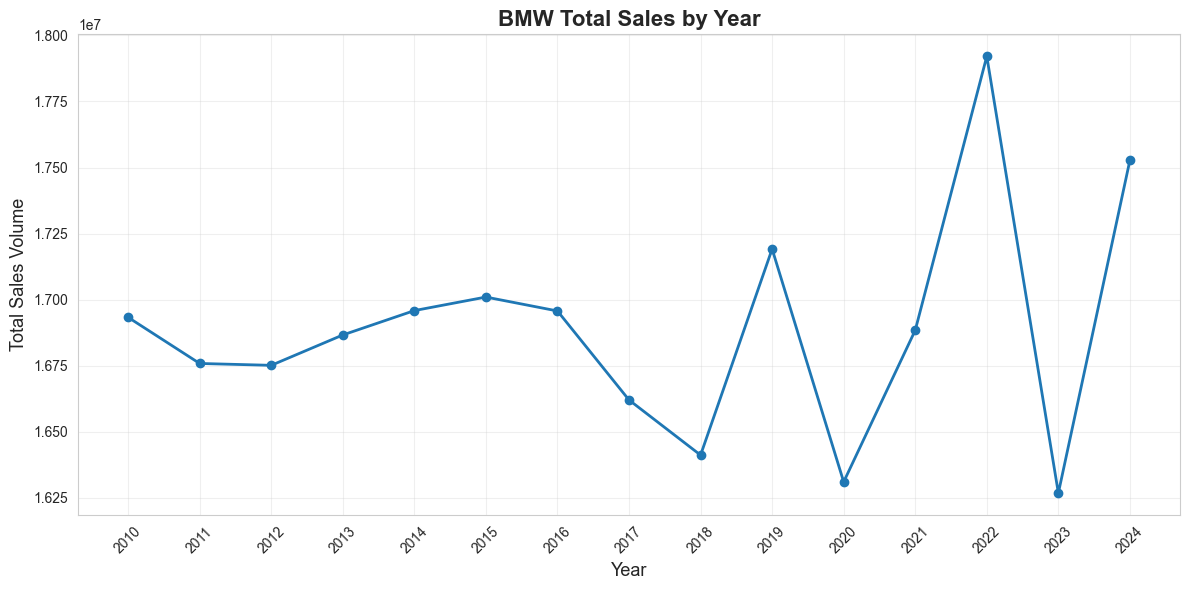

In [19]:
# Create a line plot showing sales trends over time
# This helps us see if sales are increasing, decreasing, or staying stable

plt.figure(figsize=(12, 6))  # Set figure size (width, height in inches)

# Create the line plot
# x-axis: Year, y-axis: Total_Sales
# marker='o' adds dots at each data point
# linewidth controls the thickness of the line
plt.plot(df_year['Year'], df_year['Total_Sales'], marker='o', linewidth=2, color='#1f77b4')

# Add title and axis labels
plt.title('BMW Total Sales by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total Sales Volume', fontsize=13)

# Add grid for easier reading
plt.grid(True, alpha=0.3)  # alpha controls transparency (0=invisible, 1=opaque)

# Rotate x-axis labels for better readability
plt.xticks(df_year['Year'], rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

BMW's global sales have shown notable fluctuations over the past fifteen years, reflecting both market expansion and periods of volatility. The overall trajectory reveals cycles of growth and contraction, often corresponding to macroeconomic conditions and competitive dynamics. Understanding these patterns is essential for anticipating future demand and planning strategic investments in product development and regional expansion.

## 2. Year-over-Year Growth

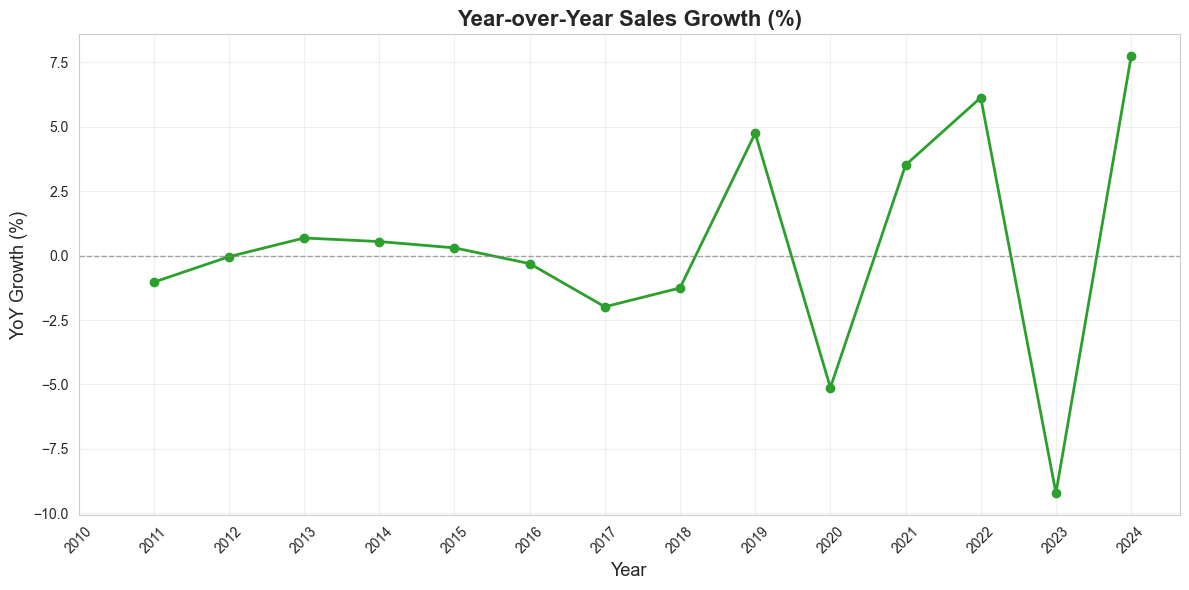

In [20]:
# Calculate Year-over-Year (YoY) growth rate
# pct_change() calculates the percentage change from previous row
# Multiply by 100 to convert to percentage
df_year["YoY_Growth"] = df_year["Total_Sales"].pct_change() * 100

# Create a line plot showing growth rates
plt.figure(figsize=(12, 6))

# Plot the growth rates
plt.plot(df_year['Year'], df_year['YoY_Growth'], marker='o', linewidth=2, color='#2ca02c')

# Add a horizontal line at 0% growth (reference line)
# This helps us see which years had positive vs negative growth
plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Add title and labels
plt.title('Year-over-Year Sales Growth (%)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('YoY Growth (%)', fontsize=13)

plt.grid(True, alpha=0.3)
plt.xticks(df_year['Year'], rotation=45)
plt.tight_layout()
plt.show()

Year-over-year growth rates reveal the underlying momentum and resilience of BMW's sales performance over time. Periods of strong positive growth often align with successful product launches or favorable market conditions, while negative growth years may indicate external shocks or intensified competition. Monitoring these fluctuations helps identify inflection points and assess the effectiveness of strategic decisions, providing critical input for risk-adjusted forecasting models.

## 3. Regional Sales Trend (Top 5 Regions)

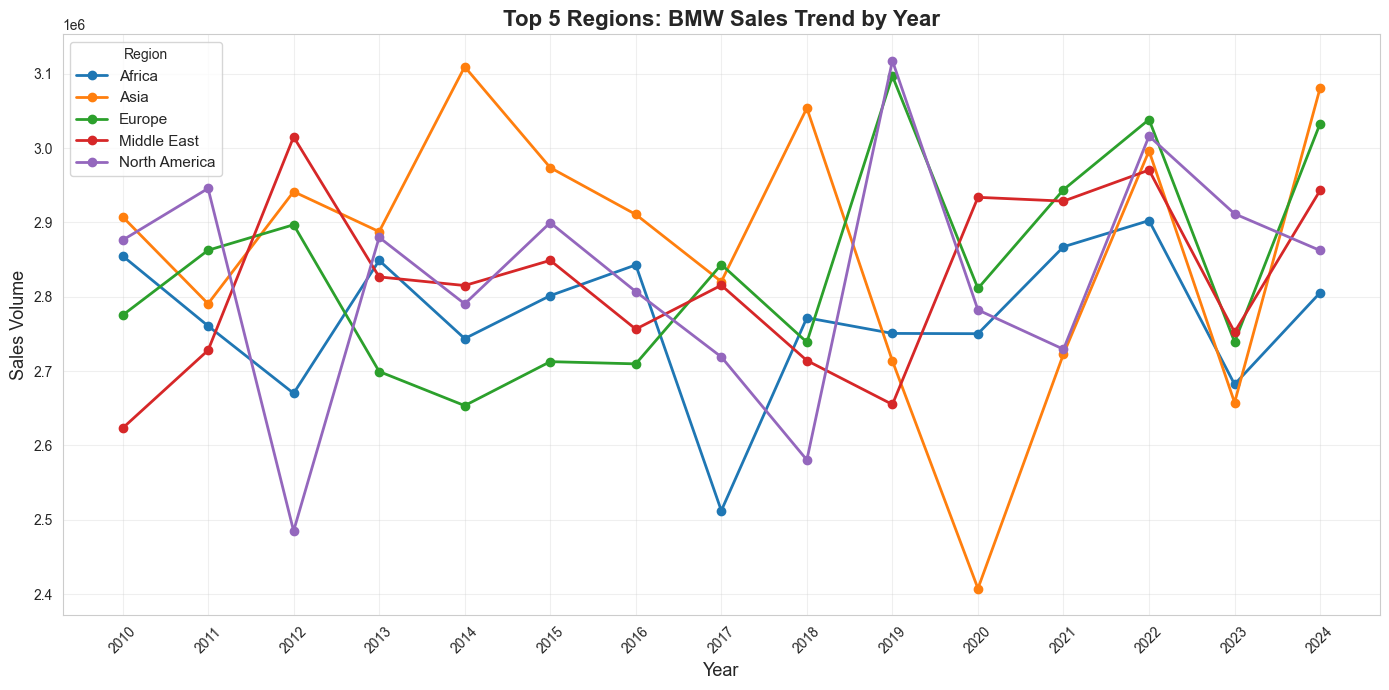

In [21]:
df_region_year = df.groupby(['Year', 'Region'], as_index=False)["Sales_Volume"].sum()
region_totals = df_region_year.groupby('Region')["Sales_Volume"].sum().sort_values(ascending=False)
top5_regions = region_totals.head(5).index.tolist()
df_top5 = df_region_year[df_region_year['Region'].isin(top5_regions)]
df_pivot = df_top5.pivot(index='Year', columns='Region', values='Sales_Volume')

plt.figure(figsize=(14, 7))
for region in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[region], marker='o', linewidth=2, label=region)
plt.title('Top 5 Regions: BMW Sales Trend by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Sales Volume', fontsize=13)
plt.legend(title='Region', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df_pivot.index, rotation=45)
plt.tight_layout()
plt.show()

Regional analysis shows that a handful of markets consistently drive the majority of BMW's global sales, with the top five regions accounting for a substantial share of total volume. While some regions demonstrate steady growth trajectories, others exhibit higher volatility, reflecting local economic conditions and evolving consumer preferences. Understanding these divergent patterns is essential for targeted marketing strategies and resource allocation across BMW's global footprint.

## 4. Sales by Fuel Type

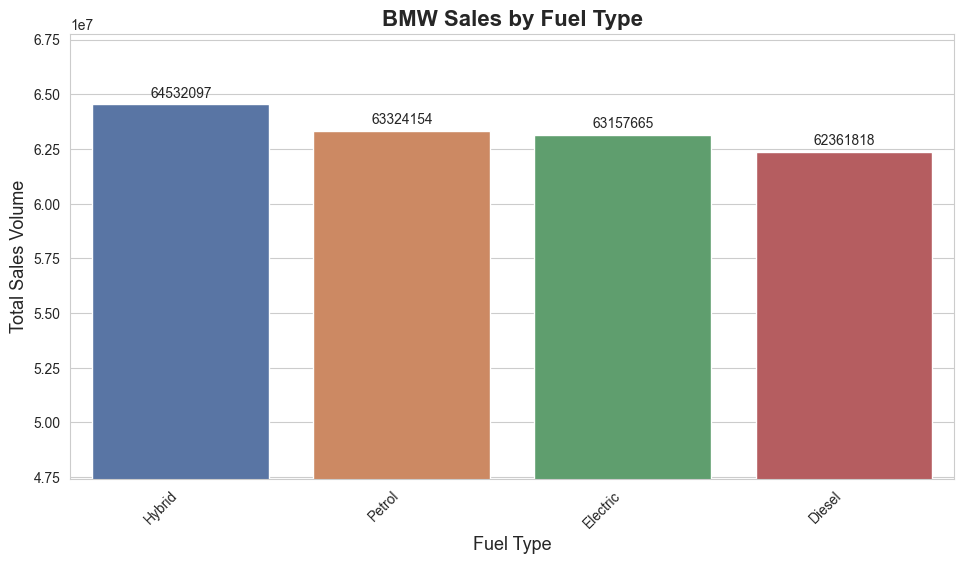

In [22]:
fuel_sales = df.groupby('Fuel_Type', as_index=False).agg({'Sales_Volume': 'sum'}).sort_values(by='Sales_Volume', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=fuel_sales, x='Fuel_Type', y='Sales_Volume', palette='deep', width=0.8)
plt.title('BMW Sales by Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=13)
plt.ylabel('Total Sales Volume', fontsize=13)
plt.xticks(rotation=45, ha='right')
# Add value labels on bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', padding=3)  # type: ignore
# Adjust y-axis to emphasize differences more aggressively
ymin, ymax = ax.get_ylim()
plt.ylim(bottom=ymax * 0.7)
plt.tight_layout(pad=2)
plt.show()

BMW's sales remain dominated by traditional fuel types, but alternative powertrains such as electric and hybrid vehicles are gaining meaningful traction. This shift reflects both evolving consumer preferences toward sustainability and regulatory pressures across key markets. The growing share of green vehicles signals a strategic imperative for continued investment in electrification, with implications for product planning, supply chain configuration, and future demand forecasting.

## 5. Top 10 Models by Sales

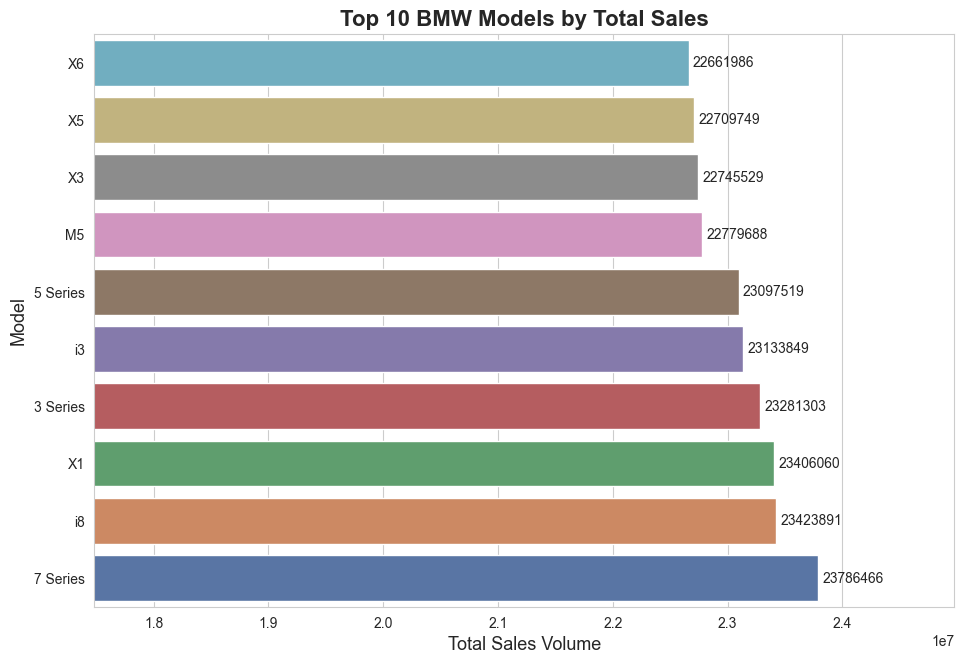

In [23]:
model_sales = df.groupby('Model', as_index=False).agg({'Sales_Volume': 'sum'}).sort_values(by='Sales_Volume', ascending=False).head(10)

plt.figure(figsize=(10, 7))
ax = sns.barplot(data=model_sales, y='Model', x='Sales_Volume', palette='deep', orient='h', width=0.8)
plt.gca().invert_yaxis()
plt.title('Top 10 BMW Models by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales Volume', fontsize=13)
plt.ylabel('Model', fontsize=13)
# Add value labels on bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', padding=3)  # type: ignore
# Adjust x-axis to emphasize differences more aggressively
xmin, xmax = ax.get_xlim()
plt.xlim(left=xmax * 0.7)
plt.tight_layout(pad=2)
plt.show()

A small number of models account for a disproportionate share of BMW's total sales, underscoring the importance of flagship vehicles in driving brand performance and profitability. These top performers often define BMW's market positioning and customer perception, making their lifecycle management and market reception critical to overall business success. Forecasting accuracy for these core models has an outsized impact on operational planning and financial outcomes.

## 6. Sales by Transmission Type

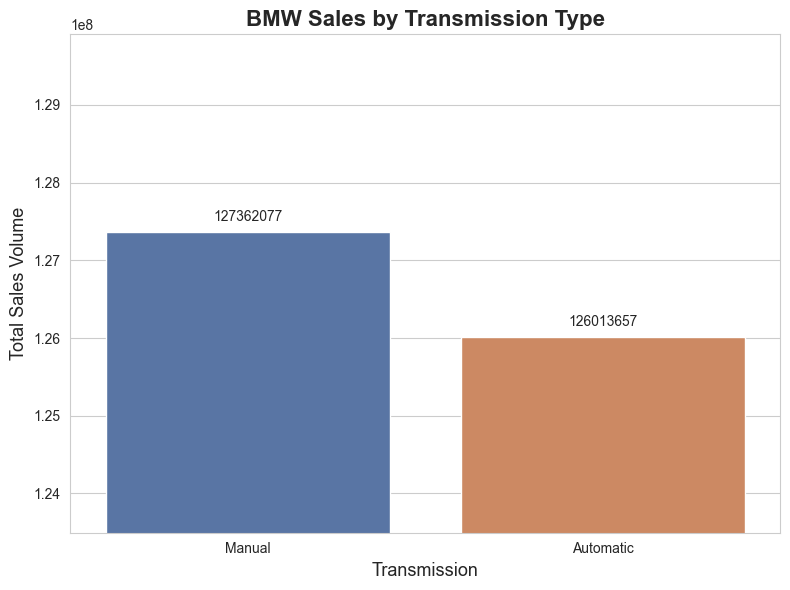

In [24]:
trans_sales = df.groupby('Transmission', as_index=False).agg({'Sales_Volume': 'sum'}) \
                 .sort_values(by='Sales_Volume', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=trans_sales, x='Transmission', y='Sales_Volume',
                 palette='deep', width=0.8)

plt.title('BMW Sales by Transmission Type', fontsize=16, fontweight='bold')
plt.xlabel('Transmission', fontsize=13)
plt.ylabel('Total Sales Volume', fontsize=13)

# Add labels
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', padding=6)  # type: ignore

# Zoom the y-axis to highlight differences
ymin = trans_sales['Sales_Volume'].min() * 0.98
ymax = trans_sales['Sales_Volume'].max() * 1.02
plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()

Automatic transmissions have become the dominant choice among BMW buyers, reflecting broader industry trends toward convenience, performance, and advanced driving technology. Manual transmissions, while still present, now represent a niche segment primarily driven by enthusiast preferences. This shift has significant implications for production planning, inventory allocation, and the design of future vehicle platforms as consumer expectations continue to evolve.

## Summary

This exploratory analysis reveals clear patterns in BMW's yearly sales performance, growth dynamics, and the influence of region, fuel type, model mix, and transmission preferences. 

**Key Takeaways:**
- Key markets and flagship models drive the majority of total volume
- Evolving consumer trends—such as the rise of electric vehicles and automatic transmissions—are reshaping the competitive landscape
- Regional performance shows remarkable balance (unusual for global brands)
- Fuel type analysis hints at the electric transition story

**Next Steps:**
- `03_feature_engineering.ipynb` - Create market segments and advanced features
- `04_forecasting.ipynb` - Build forecasting models
- `portfolio_summary.ipynb` - See the complete story-driven analysis with strategic insights

These insights provide a solid foundation for the next phase of analysis: feature engineering and the development of a robust forecasting model to predict BMW's future sales trajectory.